## Installations

In [ ]:
pip install SpeechRecognition

In [ ]:
pip install pyaudio

In [ ]:
pip install pydub

In [ ]:
conda install -c conda-forge speechrecognition

In [ ]:
conda install -c "conda-forge/label/cf201901" speechrecognition

In [ ]:
conda install -c "conda-forge/label/cf202003" speechrecognition

In [ ]:
pip install librosa


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from glob import glob
from itertools import cycle

import librosa
import librosa.display
import IPython.display as ipd

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

C:\Users\Jamil\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import speech_recognition as sr

In [3]:
sr.__version__ #Checking version should be 3.8.1

'3.8.1'

## Instantiating recognizer class

In [4]:
r = sr.Recognizer() 

## Load audio file

In [7]:

audio_files_ = (r'') #Set working directory on local machine to folder containing captcha. Include captcha name and extension
audio_files = glob(audio_files_)

## Play audio files

In [8]:

ipd.Audio(audio_files[0])

## Speech Recognition

In [9]:
output = sr.AudioFile(audio_files_) 


with output as source:
    #r.adjust_for_ambient_noise(source) 
    #audio = r.adjust_for_ambient_noise(source)
    audio = r.record(source) #, duration = 10) #can also use audio = r.listen(source) or r.record(source)
    try:
        text = r.recognize_google(audio)
        
        text = text.upper()
        
        ### Correcting mistakes
        
        if "." in text:
            text = text.replace(".","")
        
        if "&" in text:
            text = text.replace("&","")
        
        if " " in text:
            text = text.replace(" ","")
            
        if "-" in text:
            text = text.replace("-","")
        
        if "THREE" in text:
            text = text.replace("THREE","3")
            
        if "THOR" in text:
            text = text.replace("THOR","4")
        
        if "PORT" in text:
            text = text.replace("PORT","4")
            
        if "FOR" in text:
            text = text.replace("FOR","4")
            
        if "GORE" in text:
            text = text.replace("GORE","4")
        
        if "BY" in text:
            text = text.replace("BY","5")
        
        if "THAI" in text:
            text = text.replace("THAI","5")
            
        if "SEX" in text:
            text = text.replace("SEX","6")
        
        if "HEY" in text:
            text = text.replace("HEY","8")
        
        if "FEET" in text:
            text = text.replace("FEET","8")
        
        if "NIGHTS" or "NIGHT" in text:
            text = text.replace("NIGHTS" and "NIGHT","9")
        
        if "SI" in text:
            text = text.replace("SI","C")
        
        if "CI" in text:
            text = text.replace("CI","C")
            
        if "SEA" in text:
            text = text.replace("SEA","C")
       
        if "JAY" in text:
            text = text.replace("JAY","J")
            
        if "YEAH" in text:
            text = text.replace("YEAH","J")
        
        if "KAY" in text:
            text = text.replace("KAY","K")
        
        if "TE" in text:
            text = text.replace("TE","T")
        
        if "TY" in text:
            text = text.replace("TY","T")
            
        if "OUR" in text:
            text = text.replace("OUR","R")
            
        if "EM" in text:
            text = text.replace("EM","M")
        
        if "AM" in text:
            text = text.replace("AM","M")
            
        if "FIGHTS" in text:
            text = text.replace("FIGHTS","5")
        
        if "AND" in text:
            text = text.replace("AND","n")
        
        if "ARE" in text:
            text = text.replace("ARE","R")
        
        if "RI" in text:
            text = text.replace("RI","R")
            
        if "YOU" in text:
            text = text.replace("YOU","U")
            
        if "NEW" in text:
            text = text.replace("NEW","u")
        
        if "MOVIE" in text:
            text = text.replace("MOVIE","v")
            
        if "WI" in text:
            text = text.replace("WI","Y")
        
        if "YES" in text:
            text = text.replace("YES","S")
            
        if "EGGS" in text:
            text = text.replace("EGGS","X")

        if "WHY" in text:
            text = text.replace("WHY","Y")
            
            
        print(text)

    except:
        print("Could not understand audio")
    

UMHK


## Visual Analysis

In [18]:
y, sr = librosa.load(audio_files[0]) #naming the audio file y
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sample rate:{sr}')

y: [-1.3145210e-05 -1.9138799e-05 -3.0446547e-05 -4.5904399e-05
 -5.3644850e-05 -4.0284725e-05 -6.5950535e-06  2.6929851e-05
  3.4405297e-05  8.9344703e-06]
shape y: (110033,)
sample rate:22050


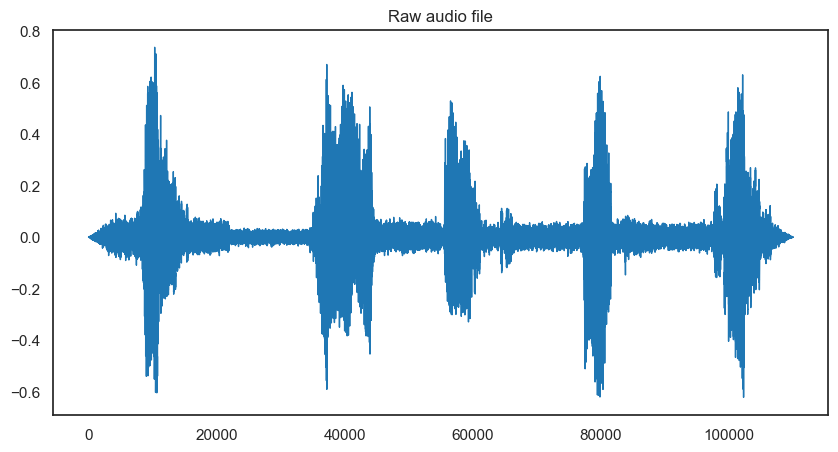

In [19]:
#Plot the audio file visually
pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw audio file")
plt.show()

In [31]:
#r.energy_threshold = 20 #Sets the threshold of the model. The model will attempt to recognize all sound above this threshold only


### Trimming leading and trailing silence (dead air)

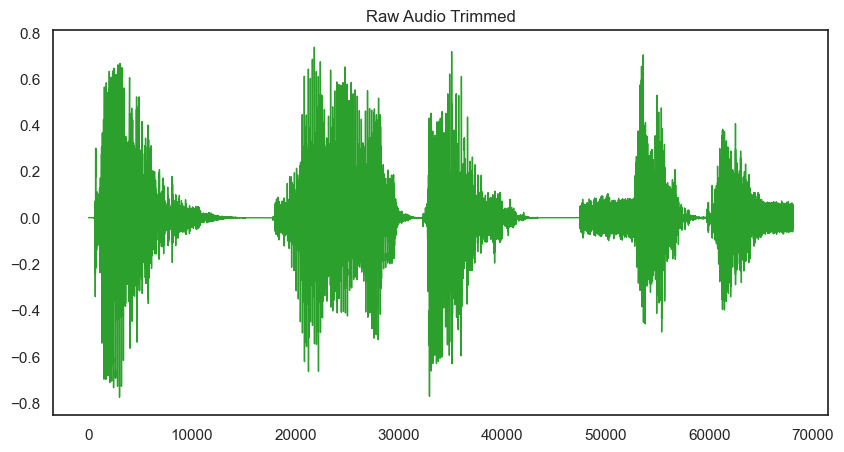

In [97]:

y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5),
                         lw=1,
                         title='Raw Audio Trimmed',
                         color=color_pal[2])

plt.show()

## Zoom in on specific section

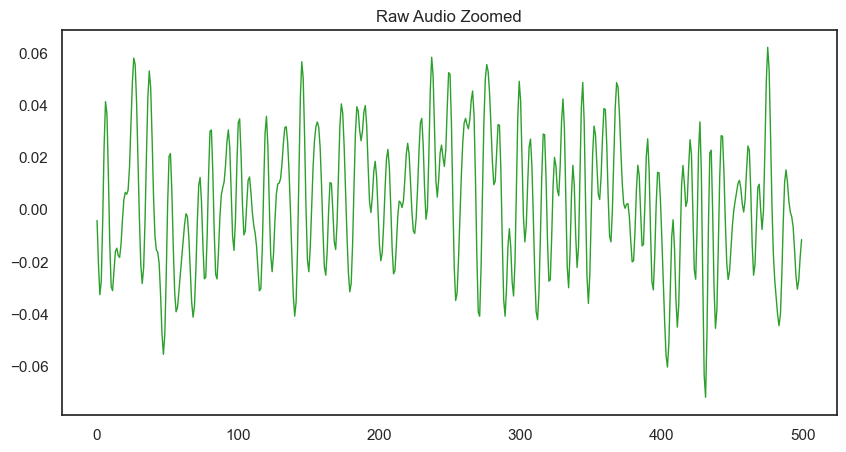

In [37]:
#Zoom in

pd.Series(y[20000:20500]).plot(figsize=(10,5), #change [:] to zoom in on a different part
                         lw=1,
                         title='Raw Audio Zoomed',
                         color=color_pal[2])
plt.show()

## Slowing the file down

In [61]:
y_slowed = librosa.effects.time_stretch(y, rate=0.5)

In [71]:
type(y_slowed)

numpy.ndarray

In [155]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 150)

## Spectogram 
#### Can extract which frequencies are sounding at which time. 
#### Can be used to analyse specific sections of the track

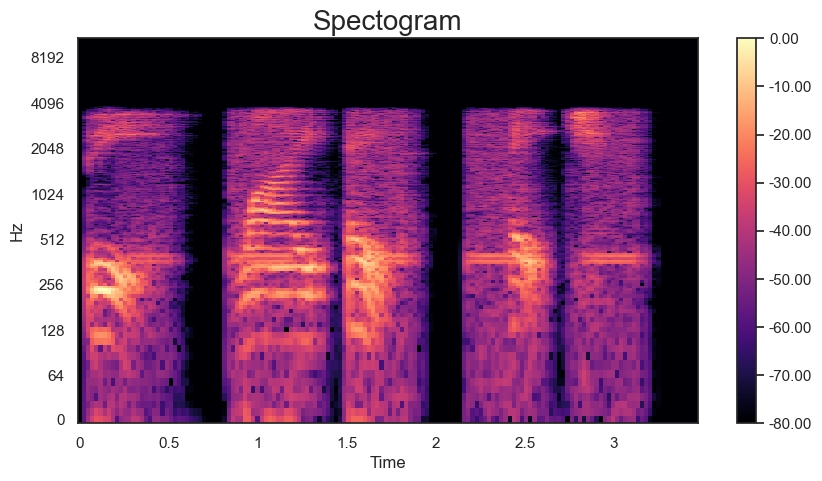

In [156]:
#Plotting the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram',fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Melodic Spectogram

In [159]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

TypeError: float() argument must be a string or a number, not 'module'

NameError: name 'S_db_mel' is not defined

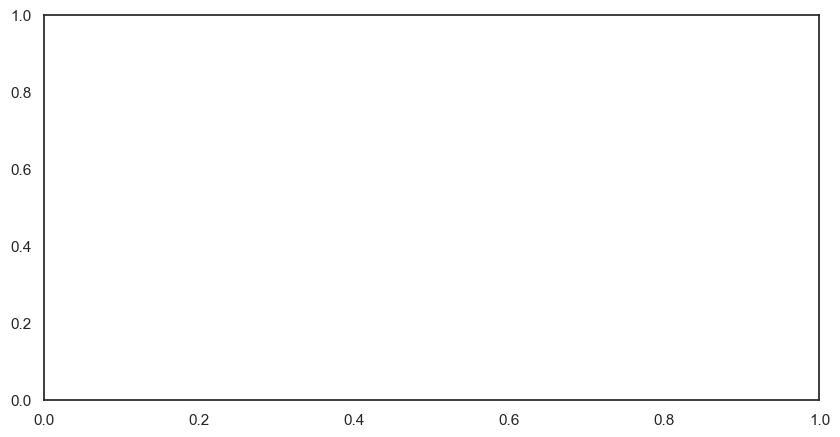

In [158]:
#fig, ax = plt.subplots(figsize=(15,5))
#Plotting the mel spectrogram 
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram',fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()